In [86]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import os
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
import yfinance as yf
from flask import Flask, render_template, request, flash, redirect, url_for
from alpha_vantage.timeseries import TimeSeries
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math, random
import preprocessor as p
import re
from sklearn.linear_model import LinearRegression
from textblob import TextBlob
import constants as ct
import nltk
nltk.download('punkt')

import warnings


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
# to fetch data
def get_data(quote):
    end = datetime.now()
    start = datetime(end.year-2,end.month,end.day)
    data = yf.download(quote,start=start,end=end)
    df = pd.DataFrame(data = data)
    df.to_csv(''+quote+'.csv')
    if df.empty:
        data = data.head(503).iloc[::-1]
        data = data.reset_index()
        
        df = pd.DataFrame()
        df=pd.DataFrame()
        df['Date']=data['date']
        df['Open']=data['1. open']
        df['High']=data['2. high']
        df['Low']=data['3. low']
        df['Close']=data['4. close']
        df['Adj Close']=data['5. adjusted close']
        df['Volume']=data['6. volume']
        df.to_csv(''+quote+'.csv',index=False)
    return df

In [88]:
quote = 'ZOMATO.NS'
# get_data(quote)

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'ZOMATO.NS Autocorrelation plot')

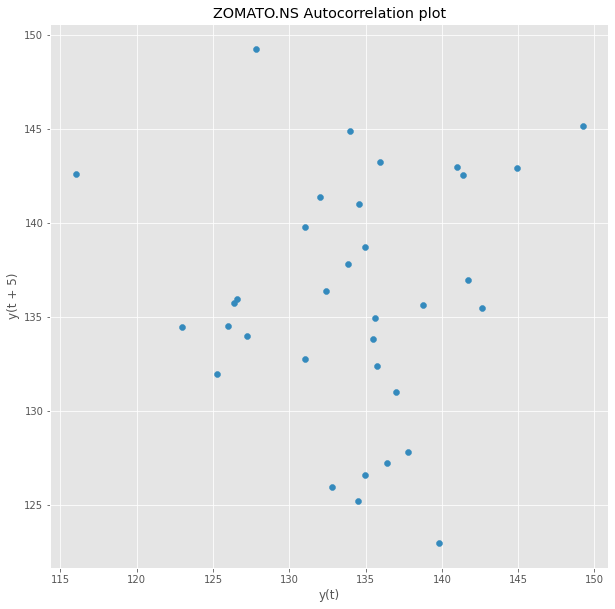

In [89]:
#arima section
df = get_data(quote)

df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('{} Autocorrelation plot'.format(quote))
#predictive model

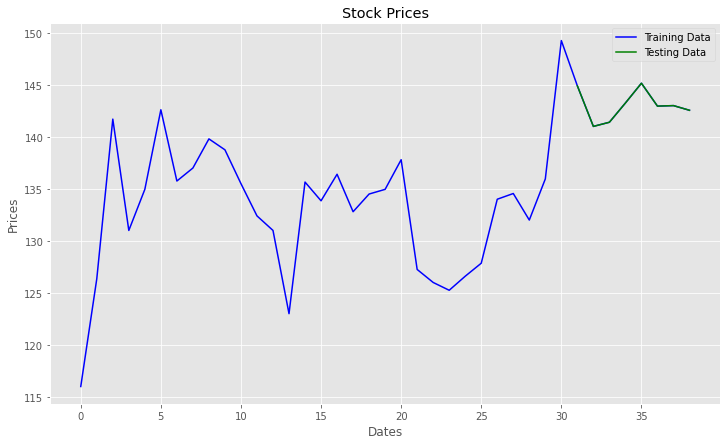

In [90]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [91]:
# SMAPE FUNCTION
# Symmetric Mean Absolute Percentage Error
def smape(y_true, y_pred):
    return np.mean((np.abs(y_pred-y_true)*200/(np.abs(y_pred) + np.abs(y_true))))

In [92]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

C:\Users\ankit\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 10.921
Symmetric mean absolute percentage error: 1.543


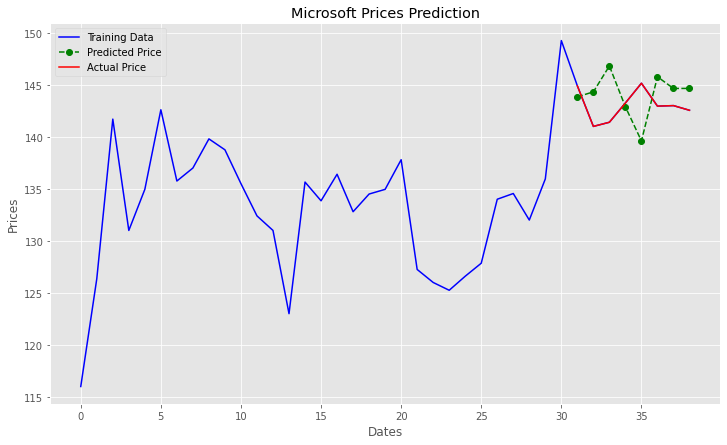

In [93]:
# past
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

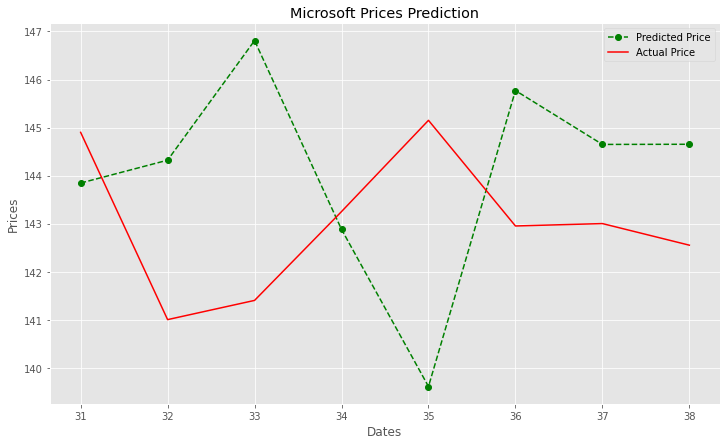

In [94]:
# prediction
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.legend()
plt.title('Stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()